In [6]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from StructuralDesign import StructuralDesign 
import numpy as np
import pandas as pd

In [11]:
def generar_muestra_aleatoria():
    """
    Genera un conjunto de datos aleatorios para entrenamiento.
    
    Args:
        num_muestras (int): Número de muestras a generar.
        
    Returns:
        list: Lista de diccionarios con las muestras generadas.
    """

    materiales = {
        'A_sec': np.random.uniform(30, 40),
        'A_trab': np.random.uniform(40, 60),
        'E': np.random.uniform(1.8e6, 2.4e6),
        'fc': np.random.uniform(180, 250)
    }
    
    datos_arquitectonicos = {
        'L1': np.random.uniform(5, 8),
        'L2': np.random.uniform(5, 8),
        'L3': np.random.uniform(5, 8),
        'L4': np.random.uniform(5, 8),
        'Pisos': np.random.randint(1, 5),
        'Cm': np.random.uniform(0.4, 0.6),
        'Cv': np.random.uniform(0.1, 0.3),
        'He': np.random.uniform(2.5, 3.5),
        'Cu': np.random.uniform(0.8, 1.2)
    }
    
    propiedades_vigas = {
        'vigas_sec_prop': {
            'iz': {'Acero': np.random.uniform(36, 50), 'bf': np.random.uniform(8, 22), 'tf': np.random.uniform(0.4, 0.6), 'h': np.random.uniform(20, 40), 'tw': np.random.uniform(0.3, 0.6)},
            'der': {'Acero': np.random.uniform(36, 50), 'bf': np.random.uniform(8, 22), 'tf': np.random.uniform(0.4, 0.6), 'h': np.random.uniform(20, 40), 'tw': np.random.uniform(0.3, 0.6)}
        },
        'vigas_trab_prop': {
            'iz': {'Acero': np.random.uniform(36, 50), 'bf': np.random.uniform(8, 22), 'tf': np.random.uniform(0.4, 0.6), 'h': np.random.uniform(20, 40), 'tw': np.random.uniform(0.3, 0.6)},
            'der': {'Acero': np.random.uniform(36, 50), 'bf': np.random.uniform(8, 22), 'tf': np.random.uniform(0.4, 0.6), 'h': np.random.uniform(20, 40), 'tw': np.random.uniform(0.3, 0.6)}
        },
        'vigas_secundarias': {
            'iz': {'Acero': np.random.uniform(36, 50), 'Lv': np.random.uniform(4, 7), 'Lt': np.random.uniform(4, 7), 'Vigas': 4},
            'der': {'Acero': np.random.uniform(36, 50), 'Lv': np.random.uniform(4, 7), 'Lt': np.random.uniform(4, 7), 'Vigas': 3}
        },
        'vigas_trab': {
            'iz': {'Acero': np.random.uniform(36, 50), 'Tipo': 'Central', 'Lv': np.random.uniform(4, 7), 'Lt': np.random.uniform(4, 7), 'Num': 4},
            'der': {'Acero': np.random.uniform(36, 50), 'Tipo': 'Central', 'Lv': np.random.uniform(4, 7), 'Lt': np.random.uniform(4, 7), 'Num': 3}
        }
    }

    propiedades_columna = {
        'columna': {'Acero': np.random.uniform(36, 50), 'Relleno hormigon': 'SI', 'b': np.random.uniform(25, 35), 'h': np.random.uniform(25, 35), 'e': np.random.uniform(0.2, 0.5)},
        'Atiesadores': {
            'Sentido_b': {'Num': 1, 'I': 4, 'e': 0.3},
            'Sentido_h': {'Num': 1, 'I': 4, 'e': 0.3}
        }
    }

    propiedades_conexiones = {
        'Prop_RBS': {
            'iz': {'a': np.random.uniform(5, 10), 'b': np.random.uniform(25, 30), 'c': np.random.uniform(3, 5), 'E_pat': np.random.uniform(50, 100), 'tp': np.random.uniform(0.7, 1.5), 'hh': np.random.uniform(0.7, 1.5), 'bp': np.random.uniform(4, 7), 'E_alma': np.random.uniform(40, 80)},
            'der': {'a': np.random.uniform(5, 10), 'b': np.random.uniform(25, 30), 'c': np.random.uniform(3, 5), 'E_pat': np.random.uniform(50, 100), 'tp': np.random.uniform(0.7, 1.5), 'hh': np.random.uniform(0.7, 1.5), 'bp': np.random.uniform(4, 7), 'E_alma': np.random.uniform(40, 80)}
        },
        'Prop_end_plate_4E': {
            'iz': {'Acero': np.random.uniform(30, 50), 'Tipo': 'A490', 'Perno': 1, 'tp': np.random.uniform(0.7, 3), 'bp': np.random.uniform(15, 25), 'g': np.random.uniform(15, 25), 'pf': np.random.uniform(2, 5), 'E': np.random.uniform(30, 80)},
            'der': {'Acero': np.random.uniform(30, 50), 'Tipo': 'A490', 'Perno': 1, 'tp': np.random.uniform(0.7, 3), 'bp': np.random.uniform(15, 25), 'g': np.random.uniform(15, 25), 'pf': np.random.uniform(2, 5), 'E': np.random.uniform(30, 80)}
        },
        'Prop_end_plate_4ES': {
            'iz': {'Acero_ep': np.random.uniform(30, 50), 'Tipo': 'A490', 'Perno': 1, 'tp': np.random.uniform(0.7, 3), 'bp': np.random.uniform(15, 25), 'g': np.random.uniform(15, 25), 'pf': np.random.uniform(2, 5), 'de': np.random.uniform(2, 5), 'E': np.random.uniform(30, 80)}, 
            'der': {'Acero_ep': np.random.uniform(30, 50), 'Tipo': 'A490', 'Perno': 1, 'tp': np.random.uniform(0.7, 3), 'bp': np.random.uniform(15, 25), 'g': np.random.uniform(15, 25), 'pf': np.random.uniform(2, 5), 'de': np.random.uniform(2, 5), 'E': np.random.uniform(30, 80)}
        },
        'Diafragma_externo': {
            'iz': {'Ln': 30, 'td': 1.2, 'Acero_de': np.random.uniform(30, 50), 'E_patin_diaf': np.random.uniform(30, 80)},
            'der': {'Ln': 32, 'td': 1.2, 'Acero_de': np.random.uniform(30, 50), 'E_patin_diaf': np.random.uniform(30, 80)}
        },
        'Prop_WUF_W': {
            'iz': {'E': np.random.uniform(50, 120), 'tp': np.random.uniform(0.4, 2), 'a': np.random.uniform(0.4, 2), 'Acero': np.random.uniform(30, 50)},
            'der': {'E': np.random.uniform(50, 120), 'tp': np.random.uniform(0.4, 2), 'a': np.random.uniform(0.4, 2), 'Acero': np.random.uniform(30, 50)}
        }
    }

    parametros_conexiones = {
        'iz': {
            'angulo_apernado': {'Perno': 3/8, 'hp': np.random.uniform(10, 20), 'Lbord': np.random.uniform(1, 5), 'bp': np.random.uniform(1, 8)},
            'angulo_soldado': {'E': np.random.uniform(50, 120), 'g': np.random.uniform(0.2, 0.8), 'hp': np.random.uniform(10, 20), 'tp': np.random.uniform(0.2, 0.8), 'bp': np.random.uniform(4, 8)},
            'asiento_apernado': {'Perno': 3/8, 'bp': np.random.uniform(1, 8)},
            'asiento_soldado': {'E': np.random.uniform(50, 120), 'bp': np.random.uniform(1, 8), 'tp': np.random.uniform(0.2, 0.8)},
            'alma_alma': {'E': np.random.uniform(50, 120), 'hs': np.random.uniform(10, 20), 'g': np.random.uniform(0.2, 0.8)}
        },
        'der': {
            'angulo_apernado': {'Perno': 3/8, 'hp': np.random.uniform(10, 20), 'Lbord': np.random.uniform(1, 8), 'bp': np.random.uniform(1, 8)},
            'angulo_soldado': {'E': np.random.uniform(50, 120), 'g': np.random.uniform(0.2, 0.8), 'hp': np.random.uniform(10, 20), 'tp': np.random.uniform(0.2, 0.8), 'bp': np.random.uniform(4, 8)},
            'asiento_apernado': {'Perno': 1/2, 'bp': np.random.uniform(1, 8)},
            'asiento_soldado': {'E': np.random.uniform(50, 120), 'bp': np.random.uniform(1, 8), 'tp': np.random.uniform(0.2, 0.8)},
            'alma_alma': {'E': np.random.uniform(50, 120), 'hs': np.random.uniform(10, 20), 'g': np.random.uniform(0.2, 0.8)}
        }
    }
    
    return {
        'materiales': materiales,
        'datos_arquitectonicos': datos_arquitectonicos,
        'propiedades_vigas': propiedades_vigas,
        'propiedades_columna': propiedades_columna,
        'propiedades_conexiones': propiedades_conexiones,
        'parametros_conexiones': parametros_conexiones
    }

    
def procesar_muestra(muestra):
    """Procesa una muestra y devuelve entradas y salidas"""
    
    # Extraer todas las entradas para el dataset
    entradas = {}
    
    # Aplanar la estructura de diccionarios anidados
    for categoria, valores in muestra.items():
        if isinstance(valores, dict):
            for clave, valor in valores.items():
                if isinstance(valor, dict):
                    for subclave, subvalor in valor.items():
                        entradas[f"{categoria}_{clave}_{subclave}"] = subvalor
                else:
                    entradas[f"{categoria}_{clave}"] = valor
        else:
            entradas[categoria] = valores

    # Crear instancia y calcular propiedades
    try:
        diseño = StructuralDesign(
            materiales=muestra['materiales'],
            datos_arquitectonicos=muestra['datos_arquitectonicos'],
            propiedades_vigas=muestra['propiedades_vigas'],
            propiedades_columna=muestra['propiedades_columna'],
            propiedades_conexiones=muestra['propiedades_conexiones'],
            parametros_conexiones=muestra['parametros_conexiones']
        )
        
        # Calcular propiedades iniciales
        diseño._calcular_propiedades_iniciales()
        
        # Calcular conexiones RBS para ambos lados
        for lado in ['iz', 'der']:
            diseño.calculate_rbs_connection(lado)
        
        # Obtener resultados clave
        resultados = {}
        
        # 1. Resultados de vigas secundarias
        for lado in ['iz', 'der']:
            if lado in diseño.data_vigas_sec:
                prefix = f"viga_sec_{lado}_"
                for param, valor in diseño.data_vigas_sec[lado]['valores'].items():
                    resultados[prefix + param] = valor
        
        # 2. Resultados de vigas trabe
        for lado in ['iz', 'der']:
            if lado in diseño.data_vigas_trab:
                prefix = f"viga_trab_{lado}_"
                for param, valor in diseño.data_vigas_trab[lado]['valores'].items():
                    resultados[prefix + param] = valor
        
        # 3. Resultados de columnas
        if 'columna' in diseño.data_columna:
            for param, valor in diseño.data_columna['columna']['valores'].items():
                resultados["columna_" + param] = valor
        
        # 4. Resultados de conexiones RBS
        for lado in ['iz', 'der']:
            if lado in diseño.resultados_RBS:
                prefix = f"rbs_{lado}_"
                # Extraer todos los parámetros de todas las secciones
                for section, data in diseño.resultados_RBS[lado].items():
                    if 'valores' in data:
                        for param, valor in data['valores'].items():
                            resultados[prefix + section + "_" + param] = valor
        
        return {**entradas, **resultados}
    
    except Exception as e:
        print(f"Error procesando muestra: {e}")
        import traceback
        traceback.print_exc()
        return None

def generar_dataset(num_muestras):
    """Genera un dataset completo"""
    datos = []
    
    for _ in range(num_muestras):
        muestra = generar_muestra_aleatoria()
        resultado = procesar_muestra(muestra)
        
        if resultado is not None:
            datos.append(resultado)
    
    return pd.DataFrame(datos)

# Generar el dataset
dataset = generar_dataset(1)  # Generar 1000 muestras

# Guardar a CSV
dataset.to_csv('dataset_entrenamiento_structural_design.csv', index=False)

print("Dataset generado exitosamente!")
print(f"Tamaño del dataset: {len(dataset)} muestras")
print("Columnas:", dataset.columns.tolist())

Dataset generado exitosamente!
Tamaño del dataset: 1 muestras
Columnas: ['materiales_A_sec', 'materiales_A_trab', 'materiales_E', 'materiales_fc', 'datos_arquitectonicos_L1', 'datos_arquitectonicos_L2', 'datos_arquitectonicos_L3', 'datos_arquitectonicos_L4', 'datos_arquitectonicos_Pisos', 'datos_arquitectonicos_Cm', 'datos_arquitectonicos_Cv', 'datos_arquitectonicos_He', 'datos_arquitectonicos_Cu', 'propiedades_vigas_vigas_sec_prop_iz', 'propiedades_vigas_vigas_sec_prop_der', 'propiedades_vigas_vigas_trab_prop_iz', 'propiedades_vigas_vigas_trab_prop_der', 'propiedades_vigas_vigas_secundarias_iz', 'propiedades_vigas_vigas_secundarias_der', 'propiedades_vigas_vigas_trab_iz', 'propiedades_vigas_vigas_trab_der', 'propiedades_columna_columna_Acero', 'propiedades_columna_columna_Relleno hormigon', 'propiedades_columna_columna_b', 'propiedades_columna_columna_h', 'propiedades_columna_columna_e', 'propiedades_columna_Atiesadores_Sentido_b', 'propiedades_columna_Atiesadores_Sentido_h', 'propied

In [8]:
class RBSDatasetGenerator:
    def __init__(self):
        # Propiedades geométricas de la viga
        self.L_beam = 6.0  # Longitud total de la viga (m)
        self.h = 0.5       # Altura total de la sección (m)
        self.tw = 0.01     # Espesor del alma (m)
        self.tf = 0.02     # Espesor del ala (m)
        self.A = 0.01      # Área de la sección (m²)
        self.Ix = 8e-6     # Momento de inercia (m⁴)
        
        # Propiedades del acero
        self.Fy = 250e6    # Límite elástico (Pa)
        self.E = 200e9     # Módulo de elasticidad (Pa)

    def calculate_rbs_properties(self, a, b, c):
        # Devuelve propiedades modificadas del ala
        bf = 0.2  # Ancho total del ala (sin recorte)
        bf_rbs = bf - 2 * b  # Reducción en cada lado
        return {'a': a, 'b': b, 'c': c, 'bf_rbs': bf_rbs}

    def simular_viga_rbs_animacion(self, a, b, c, animate=True):
        # Borrar modelo anterior
        ops.wipe()

        # Geometría reducida del ala (RBS)
        bf_total = 0.2  # Ancho completo del ala
        bf_rbs = bf_total - 2 * b

        # Crear nodos
        ops.model('basic', '-ndm', 2, '-ndf', 3)
        ops.node(1, 0, 0)
        ops.node(2, a, 0)
        ops.node(3, a + 2*c, 0)
        ops.node(4, self.L_beam/3, 0)
        ops.fix(1, 1, 1, 1)

        # Material acero no lineal
        ops.uniaxialMaterial('Steel02', 1, self.Fy, self.E, 0.03, 15, 0.925, 0.15)

        # Sección con fibras (simplificada)
        ops.section('Fiber', 1)
        d_rbs = self.h - 2 * self.tf
        partes_espesor = 2
        partes_longitudinal = 10
        ops.patch('rect', 1, partes_espesor, partes_longitudinal, -self.tw/2, -d_rbs/2, self.tw/2, d_rbs/2)  # Alma
        ops.patch('rect', 1, partes_longitudinal, partes_espesor, -bf_rbs/2, d_rbs/2, bf_rbs/2, d_rbs/2 + self.tf)  # Ala sup
        ops.patch('rect', 1, partes_longitudinal, partes_espesor, -bf_rbs/2, -d_rbs/2 - self.tf, bf_rbs/2, -d_rbs/2)  # Ala inf

        # Transformación y integración
        ops.geomTransf('Linear', 1)
        ops.beamIntegration('Lobatto', 1, 1, 5)

        # Elementos
        ops.element('elasticBeamColumn', 1, 1, 2, self.A, self.E, self.Ix, 1)
        ops.element('forceBeamColumn', 2, 2, 3, 1, 1)
        ops.element('elasticBeamColumn', 3, 3, 4, self.A, self.E, self.Ix, 1)

        # Carga inicial
        ops.timeSeries('Linear', 1)
        ops.pattern('Plain', 1, 1)
        ops.load(4, 0, 1e-6, 0)

        # Análisis de gravedad
        ops.system('BandGeneral')
        ops.constraints('Plain')
        ops.numberer('RCM')
        ops.test('NormDispIncr', 1e-3, 10)
        ops.algorithm('Newton')
        ops.integrator('LoadControl', 1.0)
        ops.analysis('Static')
        ops.analyze(1)

        # Protocolo simple de carga cíclica
        drift = 0.01
        target_disp = drift * self.L_beam

        ops.integrator('DisplacementControl', 4, 2, target_disp / 50)
        ops.analysis('Static')

        # Listas para almacenar datos de animación
        disp_list = []
        moment_list = []
        time_list = []
        node_coords_history = []
        
        esc = 1e-2
        # Protocolo más detallado
        directions = np.array([
            *np.ones(5) * 6*esc,  # Primer ciclo positivo
            *np.ones(5) * 6*esc,  # Primer ciclo negativo
            *np.ones(5) * 6*esc,    # Segundo ciclo positivo
            *np.ones(5) * 4*esc,   # Segundo ciclo negativo
            *np.ones(5) * 2*esc,   # Tercer ciclo positivo
            *np.ones(5) * 2*esc,  # Tercer ciclo negativo
            *np.ones(5) * 2*esc,  # Tercer ciclo negativo
            *np.ones(5) * 2*esc,  # Tercer ciclo negativo
        ])
        steps_per_direction = 20  # Más pasos por dirección

        step_count = 0
        for direction in directions:
            target = direction * target_disp
            step_size = target / steps_per_direction
            ops.integrator('DisplacementControl', 4, 2, step_size)
            
            for step in range(steps_per_direction):
                ops.analyze(1)
                uy = ops.nodeDisp(4, 2)
                M = ops.eleForce(2)[2]
                
                # Capturar posiciones de todos los nodos
                node_coords = {}
                for node_id in [1, 2, 3, 4]:
                    x = ops.nodeCoord(node_id, 1) + ops.nodeDisp(node_id, 1)
                    y = ops.nodeCoord(node_id, 2) + ops.nodeDisp(node_id, 2)
                    node_coords[node_id] = (x, y)
                
                disp_list.append(uy)
                moment_list.append(M)
                time_list.append(step_count)
                node_coords_history.append(node_coords)
                step_count += 1

        if animate:
            self.create_animation(node_coords_history, disp_list, moment_list, time_list)
        
        return max(disp_list) / self.L_beam, max(moment_list), disp_list, moment_list

    def create_animation(self, node_coords_history, disp_list, moment_list, time_list):
        # Crear figura con subplots (3 gráficas)
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 14))
        
        # Configurar subplot superior (estructura deformada)
        ax1.set_xlim(-0.5, 2.5)
        ax1.set_ylim(-0.15, 0.15)
        ax1.set_xlabel('Posición X (m)')
        ax1.set_ylabel('Desplazamiento Y (m)')
        ax1.set_title('Deformación de Viga RBS bajo Carga Cíclica')
        ax1.grid(True, alpha=0.3)
        
        # Líneas para la estructura original y deformada
        original_line, = ax1.plot([], [], 'k--', alpha=0.5, linewidth=2, label='Posición original')
        deformed_line, = ax1.plot([], [], 'r-', linewidth=3, label='Posición deformada')
        nodes_scatter = ax1.scatter([], [], c='blue', s=100, zorder=5)
        
        # Zona RBS (aproximada)
        rbs_zone = plt.Rectangle((0.3, -0.01), 0.2, 0.02, alpha=0.3, color='orange', label='Zona RBS')
        ax1.add_patch(rbs_zone)
        
        ax1.legend()
        
        # Configurar subplot inferior (curva momento-rotación)
        ax2.set_xlabel('Rotación (rad)')
        ax2.set_ylabel('Momento (kN·m)')
        ax2.set_title('Curva Momento-Rotación (Histéresis)')
        ax2.grid(True, alpha=0.3)
        
        # Línea para la curva momento-rotación
        moment_line, = ax2.plot([], [], 'b-', linewidth=2)
        current_point = ax2.scatter([], [], c='red', s=50, zorder=5)
        
        # Configurar subplot para señal cíclica aplicada
        ax3.set_xlabel('Tiempo (pasos)')
        ax3.set_ylabel('Desplazamiento objetivo (mm)')
        ax3.set_title('Señal de Carga Cíclica Aplicada')
        ax3.grid(True, alpha=0.3)
        
        # Crear la señal cíclica objetivo basada en el protocolo
        target_signal = self.generate_target_signal()
        
        # Líneas para la señal cíclica
        target_line, = ax3.plot([], [], 'g-', linewidth=2, label='Señal objetivo')
        actual_line, = ax3.plot([], [], 'r-', linewidth=2, label='Respuesta real')
        current_load_point = ax3.scatter([], [], c='red', s=50, zorder=5)
        
        ax3.legend()
        ax3.set_xlim(0, len(target_signal))
        ax3.set_ylim(min(target_signal) * 1.1, max(target_signal) * 1.1)
        
        # Texto para mostrar información actual
        info_text = ax1.text(0.02, 0.98, '', transform=ax1.transAxes, fontsize=10, 
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        def animate_frame(frame):
            if frame >= len(node_coords_history):
                return deformed_line, nodes_scatter, moment_line, current_point, target_line, actual_line, current_load_point, info_text
            
            # Obtener coordenadas actuales
            coords = node_coords_history[frame]
            
            # Posiciones originales
            original_x = [0, 0.3, 0.5, 2.0]
            original_y = [0, 0, 0, 0]
            original_line.set_data(original_x, original_y)
            
            # Posiciones deformadas
            deformed_x = [coords[1][0], coords[2][0], coords[3][0], coords[4][0]]
            deformed_y = [coords[1][1], coords[2][1], coords[3][1], coords[4][1]]
            deformed_line.set_data(deformed_x, deformed_y)
            
            # Actualizar nodos
            nodes_scatter.set_offsets(np.column_stack([deformed_x, deformed_y]))
            
            # Actualizar curva momento-rotación
            current_frame = min(frame + 1, len(disp_list))
            rotations = [-d / self.L_beam for d in disp_list[:current_frame]]
            moments = [m / 1000 for m in moment_list[:current_frame]]
            
            moment_line.set_data(rotations, moments)
            
            # Punto actual
            if current_frame > 0:
                current_point.set_offsets([[rotations[current_frame-1], moments[current_frame-1]]])
            
            # Ajustar límites del gráfico momento-rotación
            if len(rotations) > 0:
                ax2.set_xlim(min(rotations) * 1.1, max(rotations) * 1.1)
                ax2.set_ylim(min(moments) * 1.1, max(moments) * 1.1)
            
            # Actualizar gráfica de señal cíclica
            time_current = list(range(current_frame))
            target_current = target_signal[:current_frame]
            actual_current = [d * 1000 for d in disp_list[:current_frame]]  # Convertir a mm
            
            target_line.set_data(time_current, target_current)
            actual_line.set_data(time_current, actual_current)
            
            # Punto actual en la señal cíclica
            if current_frame > 0:
                current_load_point.set_offsets([[current_frame-1, actual_current[-1]]])
            
            # Actualizar texto informativo
            current_disp = disp_list[min(frame, len(disp_list)-1)]
            current_moment = moment_list[min(frame, len(moment_list)-1)]
            current_rot = current_disp / self.L_beam
            target_disp = target_signal[min(frame, len(target_signal)-1)]
            
            info_text.set_text(f'Paso: {frame+1}/{len(node_coords_history)}\n'
                              f'Objetivo: {target_disp:.1f} mm\n'
                              f'Real: {current_disp*1000:.1f} mm\n'
                              f'Rotación: {current_rot:.4f} rad\n'
                              f'Momento: {current_moment/1000:.1f} kN·m')
            
            return deformed_line, nodes_scatter, moment_line, current_point, target_line, actual_line, current_load_point, info_text
        
        # Crear animación
        anim = animation.FuncAnimation(fig, animate_frame, frames=len(node_coords_history), 
                                     interval=100, blit=False, repeat=True)
        
        plt.tight_layout()
        plt.show()
        
        # Guardar animación (opcional)
        # anim.save('rbs_animation.gif', writer='pillow', fps=10)
        
        return anim

    def generate_target_signal(self):
        """Genera la señal cíclica objetivo basada en el protocolo de carga"""
        drift = 0.1
        target_disp = drift * self.L_beam * 1000  # Convertir a mm
        esc = 1e-1
        
        # Mismo protocolo que en la simulación
        directions = np.array([
            *np.ones(5) * -5*esc,
            *np.ones(5) * 6*esc,
            *np.ones(5) * -4*esc,
            *np.ones(5) * 7*esc,
            *np.ones(5) * -6*esc,
            *np.ones(5) * 8*esc,
        ])
        
        steps_per_direction = 20
        signal = []
        
        for direction in directions:
            target = direction * target_disp
            # Crear rampa suave para cada dirección
            for step in range(steps_per_direction):
                progress = (step + 1) / steps_per_direction
                signal.append(target * progress)
        
        return signal

if __name__ == "__main__":
    modelo = RBSDatasetGenerator()
    
    # Parámetros de la geometría RBS
    a = 0.3   # Longitud del tramo antes de la reducción
    b = 0.025 # Reducción en el ala
    c = 0.1   # Longitud de la reducción RBS

    # Elegir si se desea animación
    usar_animacion = False

    # Ejecutar simulación
    rot_max, M_max, disp_list, moment_list = modelo.simular_viga_rbs_animacion(
        a=a, b=b, c=c, animate=usar_animacion
    )
    # Resultados
    print(f"Rotación máxima: {rot_max:.4f} rad")
    print(f"Momento máximo: {M_max/1000:.2f} kN·m")



Rotación máxima: 0.0150 rad
Momento máximo: -0.19 kN·m


In [9]:
%matplotlib ipympl
import openseespy.opensees as ops
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from animacion_rbs import *

Iniciando Nivel de Deriva: 0.375% (Despl. Objetivo: +/- 0.0075 m)
Iniciando Nivel de Deriva: 0.500% (Despl. Objetivo: +/- 0.0100 m)
Iniciando Nivel de Deriva: 0.750% (Despl. Objetivo: +/- 0.0150 m)
Iniciando Nivel de Deriva: 1.000% (Despl. Objetivo: +/- 0.0200 m)
Iniciando Nivel de Deriva: 1.500% (Despl. Objetivo: +/- 0.0300 m)
Iniciando Nivel de Deriva: 2.000% (Despl. Objetivo: +/- 0.0400 m)
Iniciando Nivel de Deriva: 3.000% (Despl. Objetivo: +/- 0.0600 m)
Iniciando Nivel de Deriva: 4.000% (Despl. Objetivo: +/- 0.0800 m)
Iniciando Nivel de Deriva: 5.000% (Despl. Objetivo: +/- 0.1000 m)
Iniciando Nivel de Deriva: 6.000% (Despl. Objetivo: +/- 0.1200 m)

Rotación máxima: 0.0600 rad
Momento máximo: 33.15 kN·m
Momento probable Mp = 287.625 kN·m
Momento probable reducido 0.8Mp = 230.1 kN·m

=== TABLA DE DESPLAZAMIENTOS DEL NODO 4 ===
 Paso  Desplazamiento (m)  Desplazamiento (mm)  Rotación (rad)  Momento (N·m)
    0        1.194074e-12         1.194074e-09    5.970372e-13  -9.974253e-07
   

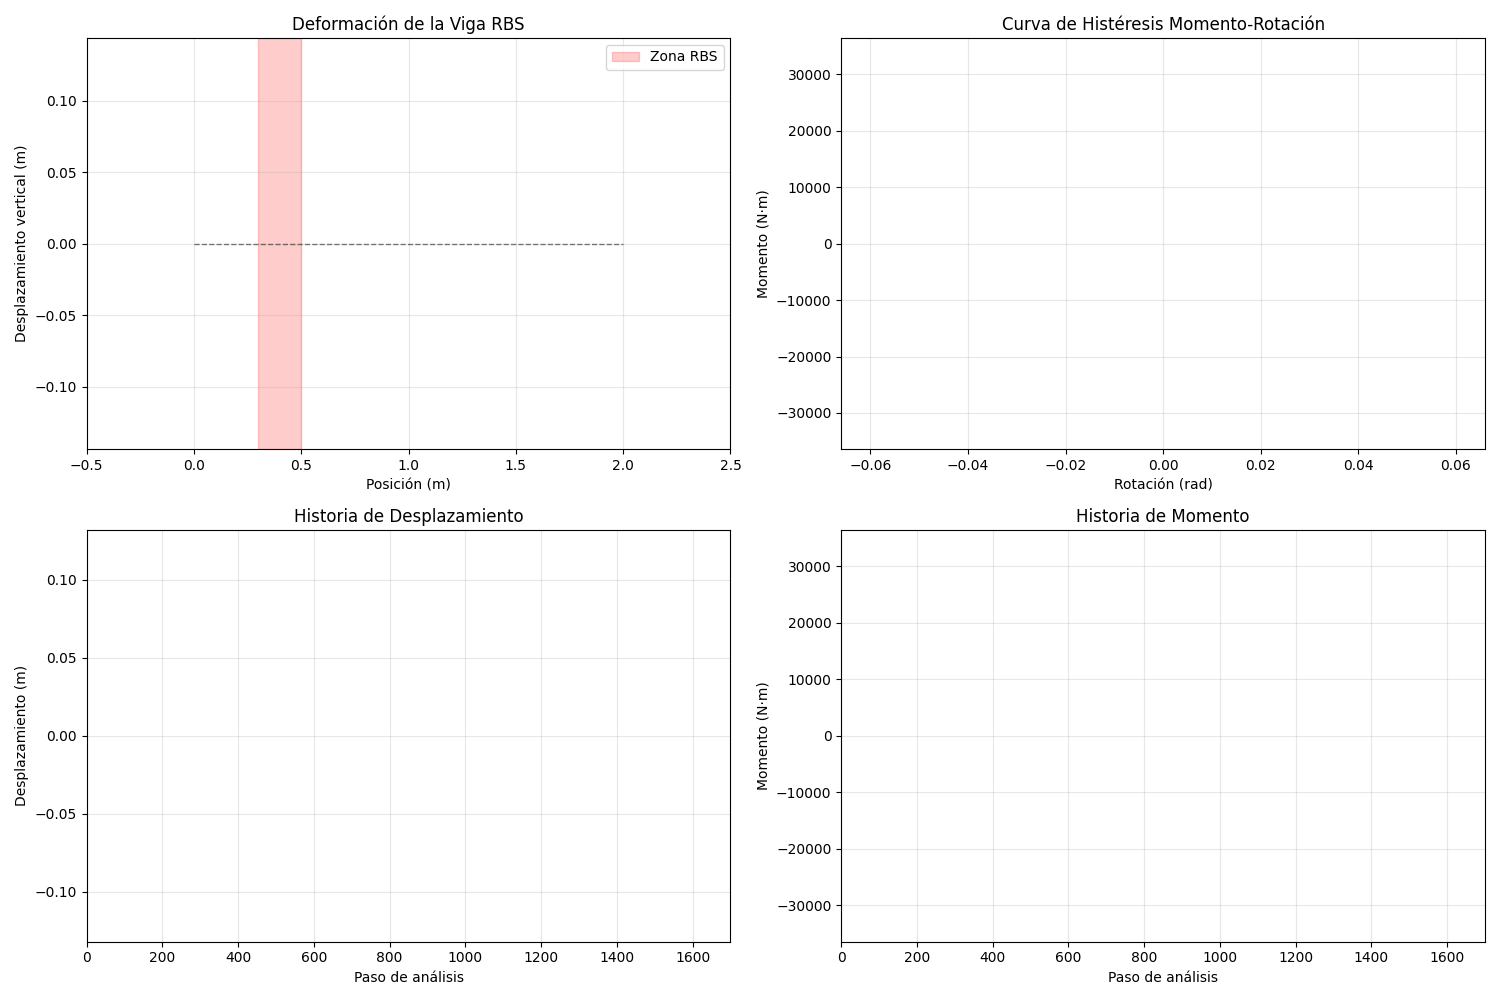

In [10]:
def calculate_plastic_moment():
    Ry = 1.3 #(NEC tabla 1 para Acero A36)
    Cpr = min((Fy+Fu)/(2*Fy), 1.2)
    Zx = (0.25*tw*(h**2)) + (b*tf*(h+tf))
    Mp = Fy * Zx * Ry # * Cpr
    return Mp

def simular_viga_rbs_animacion(a, b, c, L_beam, bf_total, animate=True):
    # Borrar modelo anterior
    ops.wipe()

    # Geometría reducida del ala (RBS)
    bf_rbs = bf_total - 2 * b

    # Crear nodos
    ops.model("basic", "-ndm", 2, "-ndf", 3)
    ops.node(1, 0, 0)
    ops.node(2, a, 0)
    ops.node(3, a + 2*c, 0)
    ops.node(4, L_beam, 0) # Punto de aplicación de carga
    ops.fix(1, 1, 1, 1)

    # Material acero no lineal
    ops.uniaxialMaterial("Steel02", 1, Fy, E, 0.03, 15, 0.925, 0.15)

    # Sección con fibras
    ops.section("Fiber", 1)
    d_rbs = h - 2 * tf
    partes_espesor = 2
    partes_longitudinal = 10
    ops.patch("rect", 1, partes_espesor, partes_longitudinal, -tw/2, -d_rbs/2, tw/2, d_rbs/2)
    ops.patch("rect", 1, partes_longitudinal, partes_espesor, -bf_rbs/2, d_rbs/2, bf_rbs/2, d_rbs/2 + tf)
    ops.patch("rect", 1, partes_longitudinal, partes_espesor, -bf_rbs/2, -d_rbs/2 - tf, bf_rbs/2, -d_rbs/2)

    # Transformación y integración
    ops.geomTransf("PDelta", 1)
    ops.beamIntegration("Lobatto", 1, 1, 5)

    # Elementos
    ops.element("forceBeamColumn", 1, 1, 2, 1, 1)
    ops.element("forceBeamColumn", 2, 2, 3, 1, 1)
    ops.element("forceBeamColumn", 3, 3, 4, 1, 1)

    # Carga inicial (gravedad)
    ops.timeSeries("Linear", 1)
    ops.pattern("Plain", 1, 1)
    ops.load(4, 0, 1e-6, 0)

    # Análisis de gravedad
    ops.system("BandGeneral")
    ops.constraints("Plain")
    ops.numberer("RCM")
    ops.test("NormDispIncr", 1e-3, 10)
    ops.algorithm("Newton")
    ops.integrator("LoadControl", 1.0)
    ops.analysis("Static")
    ops.analyze(1)

     # Niveles de deriva (rotación) y ciclos por nivel
    drift_levels = [0.00375, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06]
    cycles_per_level = [6, 6, 6, 4, 2, 2, 2, 2, 2, 2]
    steps_per_half_cycle = 25 # Pasos de análisis para cada medio ciclo

    # Listas para almacenar resultados
    disp_list = [ops.nodeDisp(4, 2)]
    moment_list = [ops.eleForce(2, 2)]
    time_list = [0]
    node_coords_history = [{i: (ops.nodeCoord(i, 1) + ops.nodeDisp(i, 1), ops.nodeCoord(i, 2) + ops.nodeDisp(i, 2)) for i in [1, 2, 3, 4]}]
    step_count = 1

    # Mantener las cargas de gravedad constantes durante el análisis cíclico
    ops.loadConst("-time", 0.0)

    # Bucle principal de carga
    for i, drift in enumerate(drift_levels):
        num_cycles = cycles_per_level[i]
        target_disp_amplitude = drift * L_beam # Amplitud de desplazamiento para este nivel
        print(f"Iniciando Nivel de Deriva: {drift*100:.3f}% (Despl. Objetivo: +/- {target_disp_amplitude:.4f} m)")
        
        for cycle in range(num_cycles):
            # Bucle para cada medio ciclo (positivo y negativo)    
            # Para el primer ciclo del primer nivel, empezar con positivo
            if i == 0 and cycle == 0:
                signs = [1, -1]
            else:
                signs = [-1, 1]

            for sign in signs:
                target_disp = target_disp_amplitude * sign
                # --- LÓGICA CORREGIDA ---
                # 1. Obtener el desplazamiento actual del nodo
                current_disp = ops.nodeDisp(4, 2)
                
                # 2. Calcular el desplazamiento neto que se necesita para este medio ciclo
                disp_to_travel = target_disp - current_disp

                # 3. Calcular el incremento correcto para el integrador
                increment = disp_to_travel / steps_per_half_cycle
                ops.integrator("DisplacementControl", 4, 2, increment)
                ops.analysis("Static")

                # 4. Realizar los pasos de análisis para el medio ciclo
                for step in range(steps_per_half_cycle):
                    ok = ops.analyze(1)
                    if ok != 0:
                        print(f"--> Análisis falló en el nivel de deriva {drift*100:.3f}%, ciclo {cycle+1}")
                        break 

                    # Guardar resultados
                    disp_list.append(ops.nodeDisp(4, 2))
                    moment_list.append(-ops.eleForce(2, 2)) # Momento en la sección RBS
                    time_list.append(step_count)
                    node_coords_history.append({j: (ops.nodeCoord(j, 1) + ops.nodeDisp(j, 1), ops.nodeCoord(j, 2) + ops.nodeDisp(j, 2)) for j in [1, 2, 3, 4]})
                    step_count += 1

                if ok != 0: break
            if ok != 0: break
        if ok != 0: break

    anim = None

    if animate:
        Mp_full_section = calculate_plastic_moment() # Obtener Mp para el plotting
        # Pasa los parámetros necesarios a create_animation
        anim = create_animation(node_coords_history, disp_list, moment_list, time_list, L_beam, a, c, Mp_full_section)

    max_disp_abs = max(abs(d) for d in disp_list)
    return max_disp_abs / L_beam, max(abs(m) for m in moment_list), disp_list, moment_list, anim


# Propiedades geométricas y de material de la viga (DEFINIDAS GLOBALMENTE)
L_beam = 2          # Longitud total de la viga (m)
h = 0.5             # Altura total de la sección (m)
tw = 0.01           # Espesor del alma (m)
tf = 0.02           # Espesor del ala (m)
A = 0.01            # Área de la sección (m²) # No usada directamente en la simulación de fibras
Ix = 8e-6           # Momento de inercia (m⁴) # No usada directamente en la simulación de fibras
bf_total = 0.2      # Ancho total del ala (sin recorte), añadido para cálculo de Mp

# Propiedades del acero
Fy = 250e6          # Límite elástico (Pa)
Fu = 400e6          # Tensión de rotura (Pa)
E = 200e9           # Módulo de elasticidad (Pa)

# Parámetros de la geometría RBS
a = 0.3   # Longitud del tramo antes de la reducción
b = 0.025 # Reducción en el ala
c = 0.1   # Longitud de la reducción RBS

# Elegir si se desea animación
usar_animacion = True

# Ejecutar simulación
rot_max, M_max, disp_list, moment_list, anim_object = simular_viga_rbs_animacion(a=a, b=b, c=c, L_beam=L_beam, bf_total=bf_total, animate=usar_animacion)

# Resultados
print(f"\nRotación máxima: {rot_max:.4f} rad")
print(f"Momento máximo: {M_max/1000:.2f} kN·m")
print(f'Momento probable Mp = {calculate_plastic_moment()/1000} kN·m')
print(f'Momento probable reducido 0.8Mp = {calculate_plastic_moment()*8/10000} kN·m')

# Crear DataFrame con los resultados
tabla_desplazamientos = pd.DataFrame({
    'Paso': range(len(disp_list)),
    'Desplazamiento (m)': disp_list,
    'Desplazamiento (mm)': [d * 1000 for d in disp_list],
    'Rotación (rad)': [d / L_beam for d in disp_list],
    'Momento (N·m)': moment_list
})

# Mostrar la tabla
print("\n=== TABLA DE DESPLAZAMIENTOS DEL NODO 4 ===")
print(tabla_desplazamientos.to_string(index=False))

# Mostrar la animación
if usar_animacion and anim_object:
    plt.show() 